
# train2023.csv VERİ SETİ

## 1 Eksik değerlerin ele alınması

In [539]:
# İlgili kütüphaneler import edilir
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [540]:
# Veri setini okumak
df_train = pd.read_csv("train2023.csv",delimiter=",")
df_train.head()

,index,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,0,34.521450,40000,134029.0,191990.0,DebtCon,Mgr,NaN,1.0,0.0,178.780960,0.0,24.0,0
1,1,34.357866,25500,113204.0,184561.0,DebtCon,Sales,17.0,1.0,0.0,308.958198,1.0,31.0,0
2,2,25.623639,26000,20119.0,54563.0,DebtCon,Other,24.0,0.0,0.0,126.987959,0.0,11.0,0
3,3,38.217726,8700,77377.0,97070.0,DebtCon,Mgr,3.0,0.0,0.0,68.854877,2.0,24.0,0
4,4,41.538051,15800,51281.0,144202.0,DebtCon,Other,1.0,0.0,0.0,285.997898,4.0,43.0,0


In [541]:
#Toplam satır ve sütun sayısına bakmak
df_train.shape

(4768, 14)

In [542]:
df_train = df_train.drop(columns="index")
df_train.head(3)

,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,34.521450,40000,134029.0,191990.0,DebtCon,Mgr,NaN,1.0,0.0,178.780960,0.0,24.0,0
1,34.357866,25500,113204.0,184561.0,DebtCon,Sales,17.0,1.0,0.0,308.958198,1.0,31.0,0
2,25.623639,26000,20119.0,54563.0,DebtCon,Other,24.0,0.0,0.0,126.987959,0.0,11.0,0


In [543]:
df_train.shape

(4768, 13)

In [544]:
# eksik veri kolonları
df_train.columns[df_train.isnull().any()]

Index(['DEBTINC', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO'],
      dtype='object')

In [545]:
# Toplam kaç tane eksik değer var
df_train.isnull().sum().sum()

4219

<Axes: >

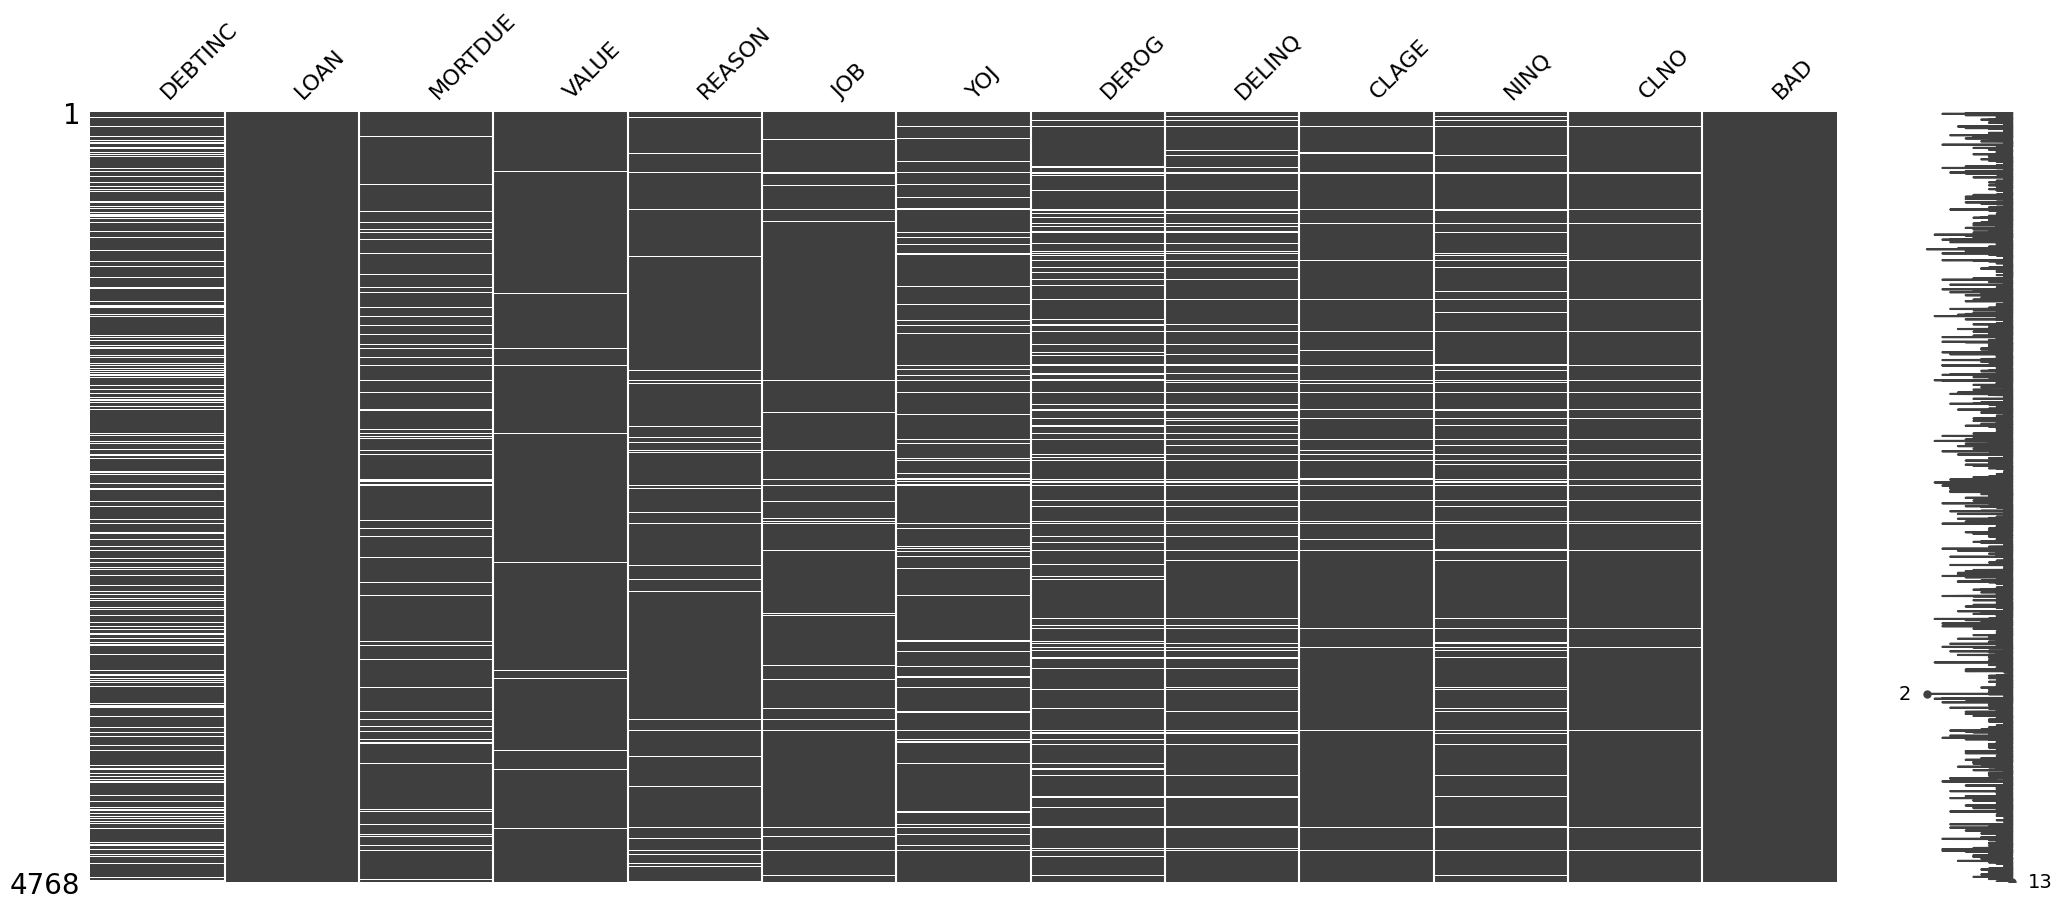

In [546]:
# Veri kümesindeki eksik verilerin görsel temsili
missingno.matrix(df_train)

In [547]:
# eksik değerleri ve eksik değer yüzdelerine bakmak 

def eksik_data(df,n):
    eksik_değerler = df.isnull().sum().sort_values(ascending=False)

    eksik_değer_yüzdesi = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False) * 100

    eksik_data = pd.concat([eksik_değerler,eksik_değer_yüzdesi],axis=1,keys = ["Eksik Değerler","Eksik Değerler Yüzdesi"],sort=False)
    print(eksik_data.head(n))

eksik_data(df_train,15)

         Eksik Değerler  Eksik Değerler Yüzdesi
DEBTINC            1027               21.539430
DEROG               575               12.059564
DELINQ              468                9.815436
NINQ                416                8.724832
YOJ                 411                8.619966
MORTDUE             403                8.452181
CLAGE               237                4.970638
JOB                 218                4.572148
REASON              200                4.194631
CLNO                176                3.691275
VALUE                88                1.845638
LOAN                  0                0.000000
BAD                   0                0.000000


In [548]:
# MORTDUE: Mevcut ipotek için ödenmesi gereken tutar
# VALUE: Mevcut mülkün değeri
# REASON: DebtCon = borç konsolidasyonu; HomeImp = ev geliştirme
# JOB: Meslek kategorileri
# YOJ: Şu anki işteki yılları
# DEROG: Büyük aşağılayıcı raporların sayısı
# DELINQ: Geciken kredi limitlerinin sayısı
# CLAGE: Ay cinsinden en eski kredi limitinin yaşı
# NINQ: Son kredi sorgularının sayısı
# CLNO: Kredi limiti sayısı
# DEBTINC: Borcun gelire oranı


In [549]:

değerler = df_train["JOB"].unique()
print(değerler)

print()

en_çok_deger = df_train["JOB"].value_counts().idxmax()
print("En çok kullanılan değer: " ,en_çok_deger)

print("mod: ", df_train["JOB"].mode())

#print("min: ", df_train["JOB"].min())

['Mgr' 'Sales' 'Other' 'Office' nan 'Self' 'ProfExe']

En çok kullanılan değer:  Other
mod:  0    Other
Name: JOB, dtype: object


In [550]:
# eksik verilerin  nasıl doldurulacağını seçmek.

def eksik_verileri_doldur(df):
    # sıfır ile doldur
    df['YOJ'] = df['YOJ'].fillna(0)
    df['DEROG'] = df['DEROG'].fillna(0)
    df['DELINQ'] = df['DELINQ'].fillna(0)
    df['NINQ'] = df['NINQ'].fillna(0)
    df['VALUE'] = df['VALUE'].fillna(0)                            
       

    # ortalama ile doldur
    df['CLAGE'] = df['CLAGE'].fillna(df['CLAGE'].mean())
    df['CLNO'] = df['CLNO'].fillna(df['CLNO'].mean())
    df['DEBTINC'] = df['DEBTINC'].fillna(df['DEBTINC'].mean())
    df['MORTDUE'] = df['MORTDUE'].fillna(df['MORTDUE'].mean())  
    

    # mod ile doldur
    df["REASON"] = df["REASON"].fillna(df["REASON"].mode()[0])
    df["JOB"] = df["JOB"].fillna(df["JOB"].mode()[0])

    return df
df = eksik_verileri_doldur(df_train)

df.head(3)

,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,34.521450,40000,134029.0,191990.0,DebtCon,Mgr,0.0,1.0,0.0,178.780960,0.0,24.0,0
1,34.357866,25500,113204.0,184561.0,DebtCon,Sales,17.0,1.0,0.0,308.958198,1.0,31.0,0
2,25.623639,26000,20119.0,54563.0,DebtCon,Other,24.0,0.0,0.0,126.987959,0.0,11.0,0


In [551]:
# Eksik veri kontrolü yapmak
eksik_verilerin_toplamı = df_train.isnull().sum().sum()
print("Eksik verilerin toplamı:",eksik_verilerin_toplamı)

Eksik verilerin toplamı: 0


## 2 Aykırı değerlerin tespiti 

In [552]:
# sayısal değişkenlerin listesi
numerical_features_1 = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features_1))

# sayısal değişkenleri görelim
df_train[numerical_features_1].head()

Number of numerical variables:  11


,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,34.521450,40000,134029.0,191990.0,0.0,1.0,0.0,178.780960,0.0,24.0,0
1,34.357866,25500,113204.0,184561.0,17.0,1.0,0.0,308.958198,1.0,31.0,0
2,25.623639,26000,20119.0,54563.0,24.0,0.0,0.0,126.987959,0.0,11.0,0
3,38.217726,8700,77377.0,97070.0,3.0,0.0,0.0,68.854877,2.0,24.0,0
4,41.538051,15800,51281.0,144202.0,1.0,0.0,0.0,285.997898,4.0,43.0,0


In [553]:

# yıl bilgisini içeren değişkenlerin listesini tek tek bakarak da kolayca bulabiliriz ya da aşağıdaki gibi bir mantık de kullanabiliriz
year_feature = [feature for feature in numerical_features_1 if 'Yr' in feature or 'Year' in feature]

year_feature


# yıl değişkenlerini görelim
# df[year_feature].head()

[]

In [554]:
numerical_features_2 = [i for i in numerical_features_1 if i not in year_feature]

print('Number of numerical variables remaining: ', len(numerical_features_2))

Number of numerical variables remaining:  11


In [555]:
discrete_features=[feature for feature in numerical_features_2 if len(df[feature].unique())<25]

print("Kesikli Değişken Sayısı: {}".format(len(discrete_features)))

Kesikli Değişken Sayısı: 4


In [556]:
# Sayısal alanlarımızın icindeki tekil değer sayılarını görüyoruz, bu şekilde de discrete mi continuous mu anlayabiliriz
[print(feature, len(df_train[feature].unique())) for feature in numerical_features_2 ]

DEBTINC 3742
LOAN 508
MORTDUE 4075
VALUE 4331
YOJ 90
DEROG 11
DELINQ 13
CLAGE 4289
NINQ 16
CLNO 63
BAD 2


[None, None, None, None, None, None, None, None, None, None, None]

In [557]:
continuous_feature=[feature for feature in numerical_features_2 if feature not in discrete_features]

print("Sürekli Değişken Sayısı {}".format(len(continuous_feature)))

Sürekli Değişken Sayısı 7


In [558]:
# sayısal sürekli değişkenleri görelim
df_train[continuous_feature].head(10)

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,CLAGE,CLNO
0,34.521450,40000,134029.0,191990.0,0.0,178.780960,24.000000
1,34.357866,25500,113204.0,184561.0,17.0,308.958198,31.000000
2,25.623639,26000,20119.0,54563.0,24.0,126.987959,11.000000
3,38.217726,8700,77377.0,97070.0,3.0,68.854877,24.000000
4,41.538051,15800,51281.0,144202.0,1.0,285.997898,43.000000
5,33.864152,12000,44000.0,59500.0,3.7,172.500000,14.000000
6,38.582670,12000,84172.0,123415.0,9.0,139.018449,21.000000
7,40.932767,11900,63833.0,0.0,3.0,179.442286,21.391551
8,24.470300,13400,78465.0,97506.0,5.0,71.443665,21.000000
9,40.152144,18000,107546.0,176314.0,6.0,218.019386,23.000000


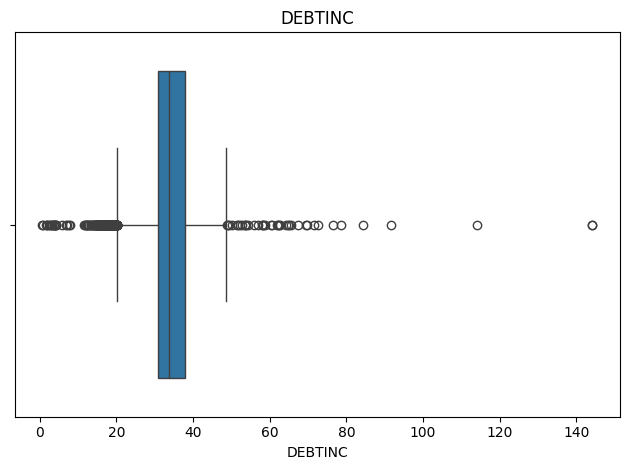

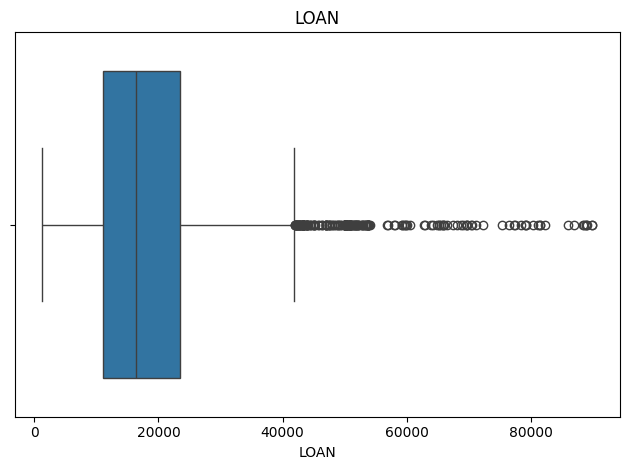

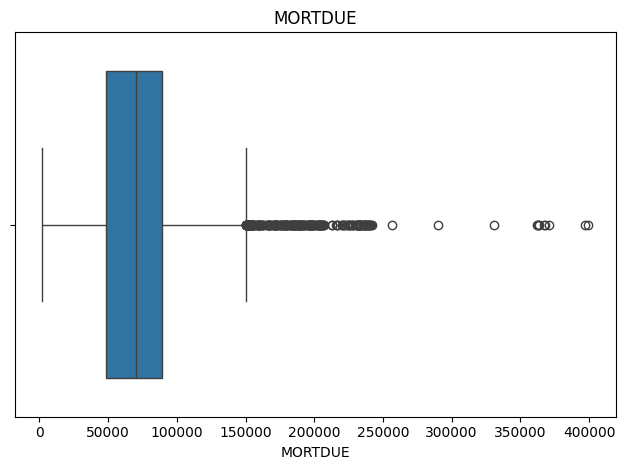

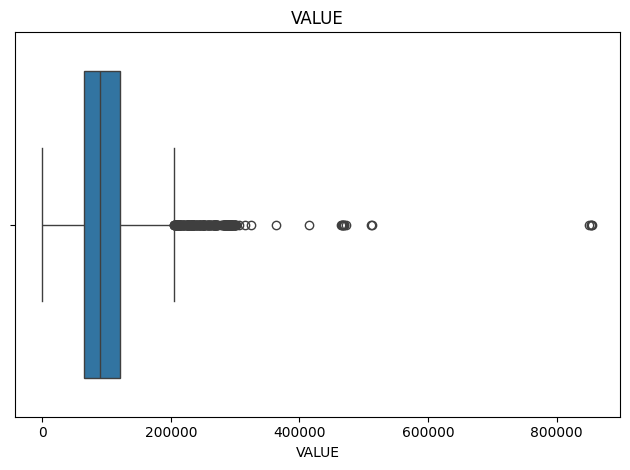

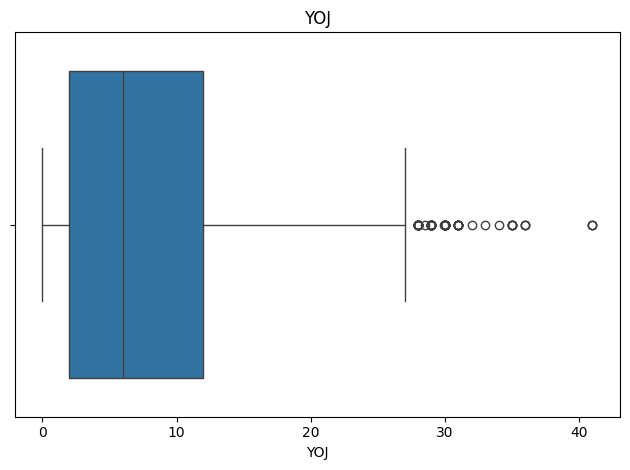

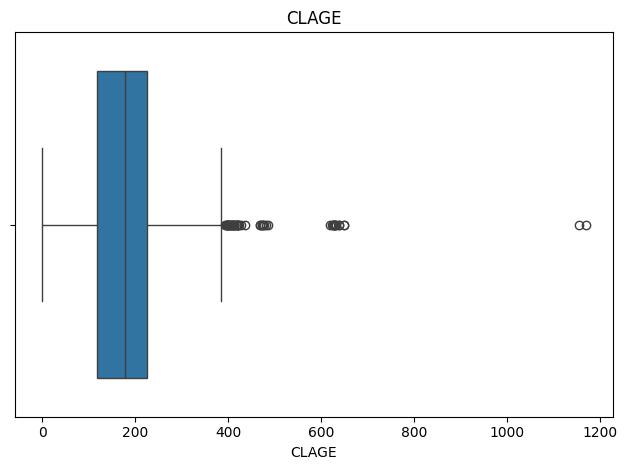

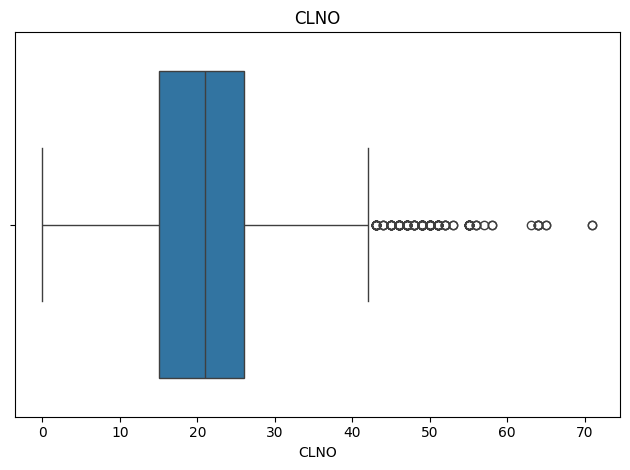

In [559]:
# aykırı değeri olan sutunların grfiğini çizmek
# Bütün kolonların Boxplot grafiğini çizip aykırı değerleri değerlendirmek


# Her bir numeric sütunu için aykırı değerleri belirleyin
for col in continuous_feature:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Sadece aykırı değerlere sahip sütunları çiz
    if any((df_train[col] < lower_limit) | (df_train[col] > upper_limit)):
        sns.boxplot(x=df_train[col])
        plt.title(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col} sütununda aykırı değer bulunmamaktadır.")

In [560]:
# Sadece seçtiğimiz kolonları min-max ile baskılamak

def aykiri_degerleri_min_max_sinirlar_ile_doldur(df, sutunlar):
    for col in sutunlar:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        alt_sinir = Q1 - 1.5 * IQR
        ust_sinir = Q3 + 1.5 * IQR

        df.loc[df[col] < alt_sinir, col] = alt_sinir
        df.loc[df[col] > ust_sinir, col] = ust_sinir

    
        
    return df

# Aykırı değerleri düzeltmek istediğiniz sütunları seçin
secilen_sutunlar = continuous_feature

# Aykırı değerleri düzelt
df = aykiri_degerleri_min_max_sinirlar_ile_doldur(df_train, secilen_sutunlar)


In [561]:
# Her bir numeric sütunu için aykırı değerleri belirleyin
for col in continuous_feature:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Sadece aykırı değerlere sahip sütunları çiz
    if any((df_train[col] < lower_limit) | (df_train[col] > upper_limit)):
        sns.boxplot(x=df_train[col])
        plt.title(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col}: sütununda aykırı değer bulunmamaktadır.")

DEBTINC: sütununda aykırı değer bulunmamaktadır.
LOAN: sütununda aykırı değer bulunmamaktadır.
MORTDUE: sütununda aykırı değer bulunmamaktadır.
VALUE: sütununda aykırı değer bulunmamaktadır.
YOJ: sütununda aykırı değer bulunmamaktadır.
CLAGE: sütununda aykırı değer bulunmamaktadır.
CLNO: sütununda aykırı değer bulunmamaktadır.


## 3 Kategorik verilerin dönüşümü

In [562]:
def sütunlari_veri_türune_gore_grupla(df):
    result_dict = {}

    for col, dtype in df.dtypes.items():
        dtype_str = str(dtype)
        
        if dtype_str not in result_dict:
            result_dict[dtype_str] = []
        
        result_dict[dtype_str].append(col)

    result_str = ""
    for dtype, columns in result_dict.items():
        result_str += f"\n{dtype} Veri Türü Sütunları:\n"
        result_str += ', '.join(columns) + '\n'
        result_str += '=' * 50 + '\n'

    return result_str

# df DataFrame'iniz olduğunu varsayalım
result = sütunlari_veri_türune_gore_grupla(df_train)

# Sonuçları görüntüleme
print(result)


float64 Veri Türü Sütunları:
DEBTINC, MORTDUE, VALUE, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO

int64 Veri Türü Sütunları:
LOAN, BAD

object Veri Türü Sütunları:
REASON, JOB



In [563]:
df_train.REASON.unique()

array(['DebtCon', 'HomeImp'], dtype=object)

In [564]:
df_train.JOB.unique()

array(['Mgr', 'Sales', 'Other', 'Office', 'Self', 'ProfExe'], dtype=object)

In [565]:
df_train = pd.get_dummies(df_train, drop_first=True, columns=['JOB', 'REASON'],dtype=int)
df_train.head()

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,REASON_HomeImp
0,34.521450,40000,134029.0,191990.0,0.0,1.0,0.0,178.780960,0.0,24.0,0,0,0,0,0,0,0
1,34.357866,25500,113204.0,184561.0,17.0,1.0,0.0,308.958198,1.0,31.0,0,0,0,0,1,0,0
2,25.623639,26000,20119.0,54563.0,24.0,0.0,0.0,126.987959,0.0,11.0,0,0,1,0,0,0,0
3,38.217726,8700,77377.0,97070.0,3.0,0.0,0.0,68.854877,2.0,24.0,0,0,0,0,0,0,0
4,41.538051,15800,51281.0,144202.0,1.0,0.0,0.0,285.997898,4.0,42.5,0,0,1,0,0,0,0


In [566]:
result = sütunlari_veri_türune_gore_grupla(df_train)

# Sonuçları görüntüleme
print(result)


float64 Veri Türü Sütunları:
DEBTINC, MORTDUE, VALUE, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO

int64 Veri Türü Sütunları:
LOAN, BAD

int32 Veri Türü Sütunları:
JOB_Office, JOB_Other, JOB_ProfExe, JOB_Sales, JOB_Self, REASON_HomeImp



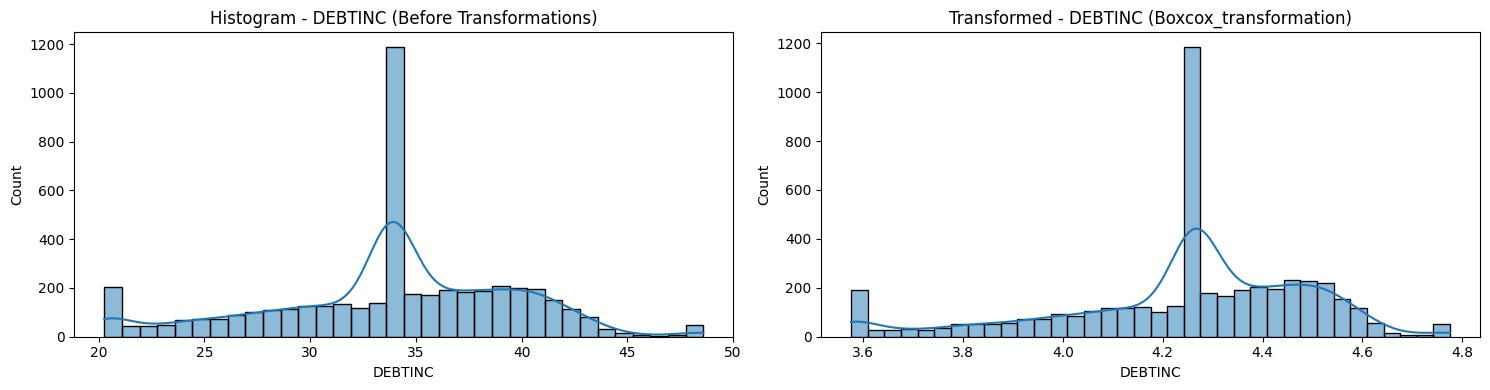

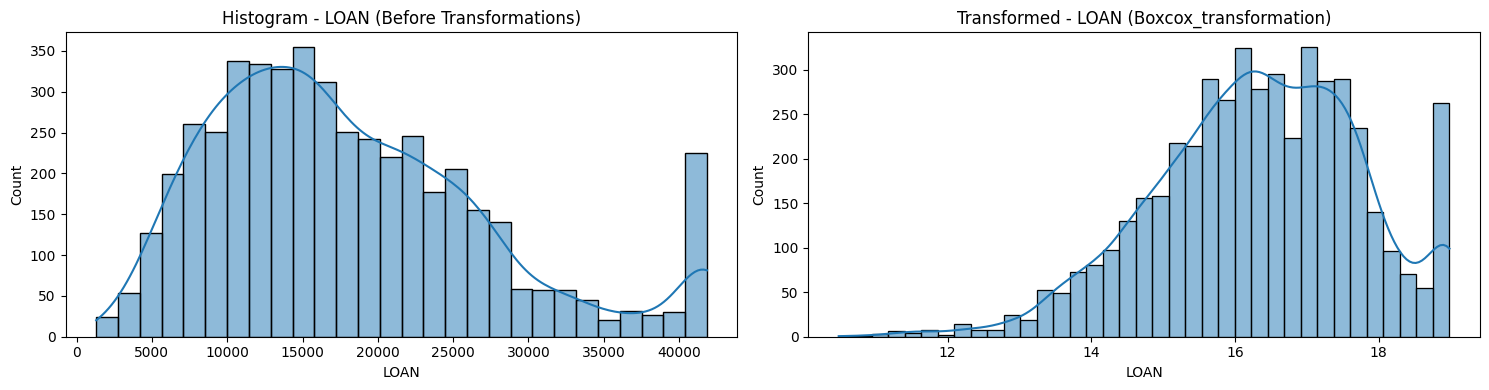

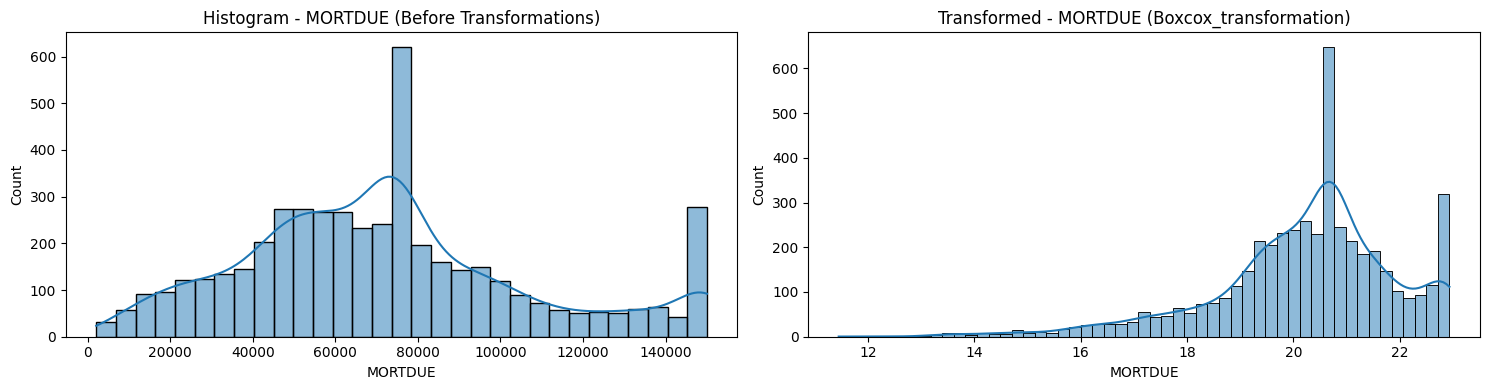

In [567]:
from sklearn.preprocessing import RobustScaler
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def apply_transformations(df, transformation_list):
    transformed_data = df.copy()

    for column in df.select_dtypes(include=['number']):
        skewness_before = skew(df[column])
        kurt_before = kurtosis(df[column])

        # Seçilen dönüşümleri uygula
        for transformation in transformation_list:
            if transformation == 'trimming':
                # Aykırı değerleri kırpma (Trimming)
                Q1 = df[column].quantile(0.25)
                Q3 = df[column].quantile(0.75)
                IQR = Q3 - Q1
                lower_limit = Q1 - 1.5 * IQR
                upper_limit = Q3 + 1.5 * IQR
                transformed_data[column] = df[column].clip(lower=lower_limit, upper=upper_limit)

            elif transformation == 'robust_scaling':
                # Robust Standartlaştırma
                scaler = RobustScaler()
                transformed_data[column] = scaler.fit_transform(df[[column]])

            elif transformation == 'log_transformation':
                # Log Dönüşümü
                transformed_data[column] = np.log1p(df[column])

            elif transformation == 'sqrt_transformation':
                # Kök Dönüşümü
                transformed_data[column] = np.sqrt(df[column])

            elif transformation == 'boxcox_transformation':
                # Box-Cox Dönüşümü
                transformed_data[column] = boxcox1p(df[column], 0.1)

        skewness_after = skew(transformed_data[column])
        kurt_after = kurtosis(transformed_data[column])

        # Görselleştirme
        if column in df.columns[:3]:
            fig, axes = plt.subplots(nrows=1, ncols=len(transformation_list) + 1, figsize=(15, 4))

            sns.histplot(df[column], ax=axes[0], kde=True)
            axes[0].set_title(f'Histogram - {column} (Before Transformations)')

            for i, transformation in enumerate(transformation_list):
                sns.histplot(transformed_data[column], ax=axes[i + 1], kde=True)
                axes[i + 1].set_title(f'Transformed - {column} ({transformation.capitalize()})')

            plt.tight_layout()
            plt.show()

    return transformed_data

# Kullanılacak dönüşüm yöntemlerini belirt
transformation_list = ['boxcox_transformation']
# Dönüşümleri uygula
df_transformed = apply_transformations(df_train, transformation_list)

In [568]:
df_train.head()

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,REASON_HomeImp
0,34.521450,40000,134029.0,191990.0,0.0,1.0,0.0,178.780960,0.0,24.0,0,0,0,0,0,0,0
1,34.357866,25500,113204.0,184561.0,17.0,1.0,0.0,308.958198,1.0,31.0,0,0,0,0,1,0,0
2,25.623639,26000,20119.0,54563.0,24.0,0.0,0.0,126.987959,0.0,11.0,0,0,1,0,0,0,0
3,38.217726,8700,77377.0,97070.0,3.0,0.0,0.0,68.854877,2.0,24.0,0,0,0,0,0,0,0
4,41.538051,15800,51281.0,144202.0,1.0,0.0,0.0,285.997898,4.0,42.5,0,0,1,0,0,0,0


test2023.csv veri seti

## 1 Eksik değerlerin ele alınması

In [569]:
# Veri setini okumak
df_test = pd.read_csv("test2023.csv",delimiter=",")
df_test.head()

,index,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,4768,22.065764,25800,NaN,63456.0,DebtCon,Other,25.0,0.0,0.0,148.816285,0.0,8.0
1,4769,20.380464,16400,62018.0,91832.0,DebtCon,ProfExe,9.0,0.0,0.0,202.322500,0.0,19.0
2,4770,29.476003,22400,18371.0,38311.0,DebtCon,Other,1.0,0.0,0.0,37.235000,2.0,3.0
3,4771,NaN,33400,59000.0,85000.0,HomeImp,Self,2.0,0.0,7.0,240.433333,3.0,26.0
4,4772,29.045964,23000,71902.0,101750.0,HomeImp,Other,5.0,0.0,0.0,214.389252,0.0,13.0


In [570]:
#Toplam satır ve sütun sayısına bakmak
df_test.shape

(1192, 13)

In [571]:
df_test = df_test.drop(columns="index")
df_test.head(3)

,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,22.065764,25800,NaN,63456.0,DebtCon,Other,25.0,0.0,0.0,148.816285,0.0,8.0
1,20.380464,16400,62018.0,91832.0,DebtCon,ProfExe,9.0,0.0,0.0,202.322500,0.0,19.0
2,29.476003,22400,18371.0,38311.0,DebtCon,Other,1.0,0.0,0.0,37.235000,2.0,3.0


In [572]:
# eksik veri kolonları
df_test.columns[df_test.isnull().any()]

Index(['DEBTINC', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO'],
      dtype='object')

In [573]:
# Toplam kaç tane eksik değer var
df_test.isnull().sum().sum()

1052

<Axes: >

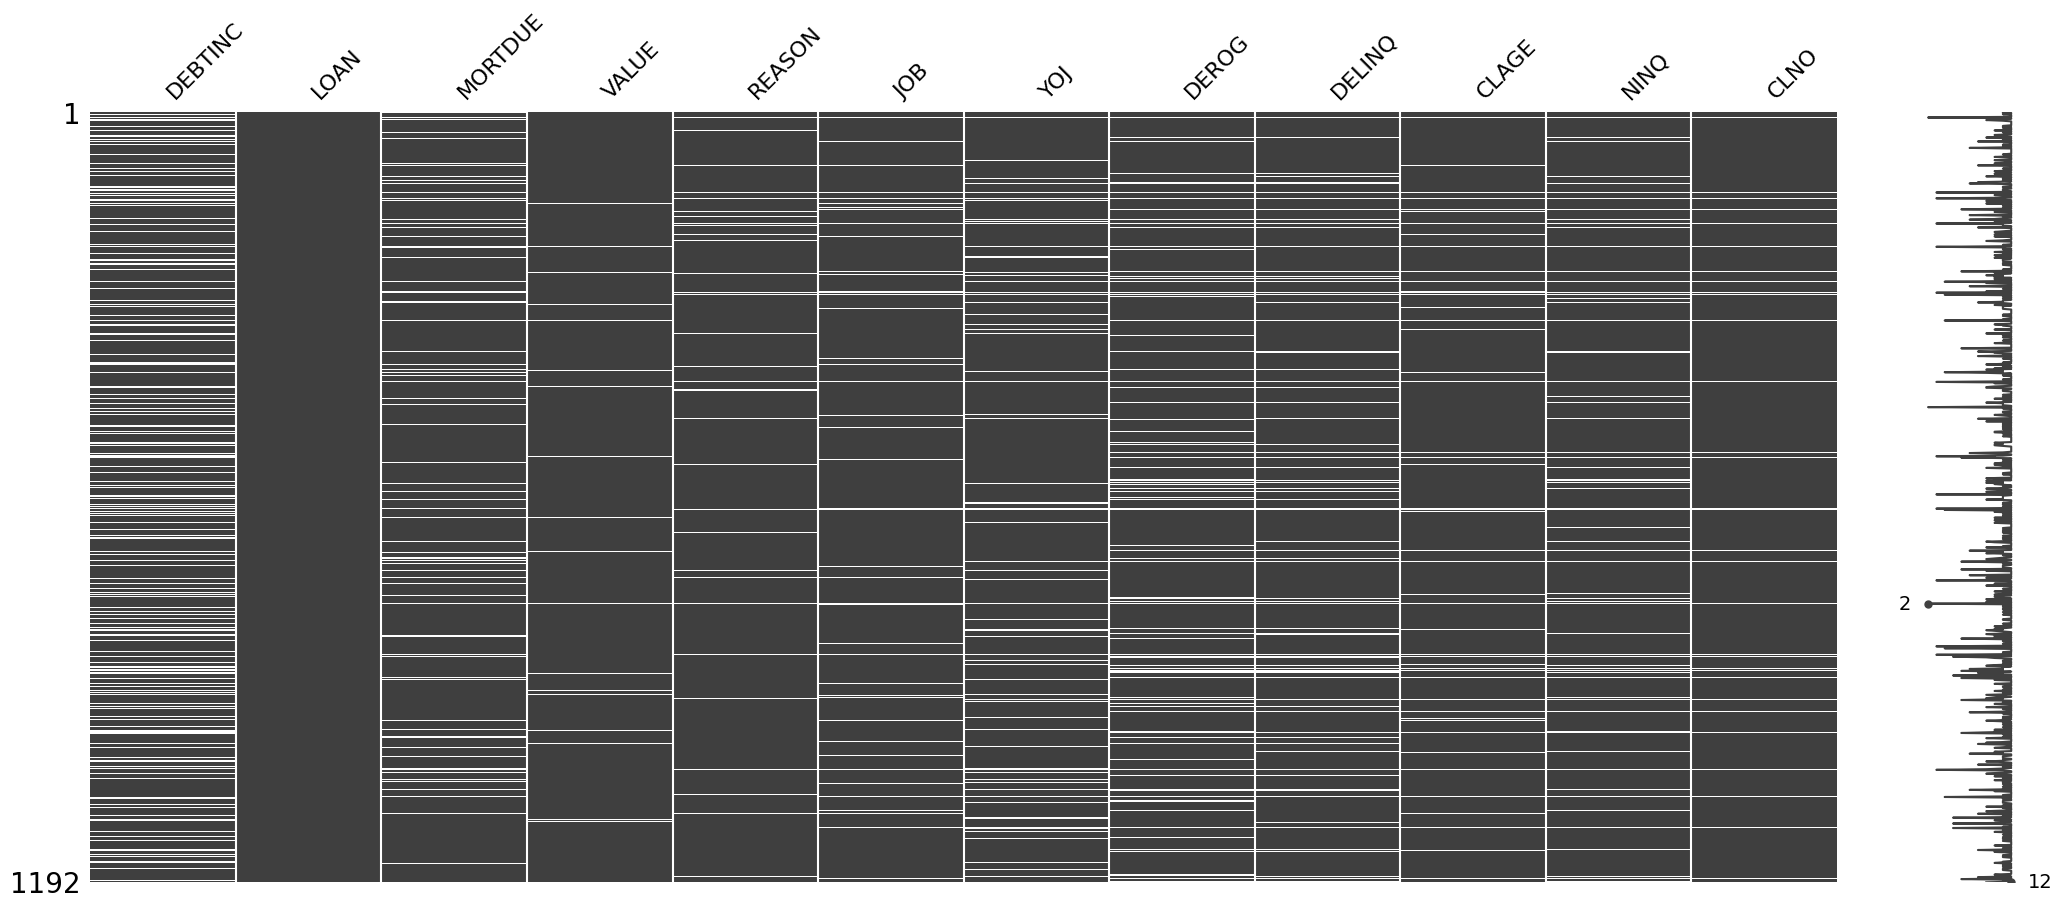

In [574]:
# Veri kümesindeki eksik verilerin görsel temsili
missingno.matrix(df_test)

In [575]:
# eksik değerleri ve eksik değer yüzdelerine bakmak 

def eksik_data(df,n):
    eksik_değerler = df.isnull().sum().sort_values(ascending=False)

    eksik_değer_yüzdesi = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False) * 100

    eksik_data = pd.concat([eksik_değerler,eksik_değer_yüzdesi],axis=1,keys = ["Eksik Değerler","Eksik Değerler Yüzdesi"],sort=False)
    print(eksik_data.head(n))

eksik_data(df_test,15)

         Eksik Değerler  Eksik Değerler Yüzdesi
DEBTINC             240               20.134228
DEROG               133               11.157718
MORTDUE             115                9.647651
DELINQ              112                9.395973
YOJ                 104                8.724832
NINQ                 94                7.885906
CLAGE                71                5.956376
JOB                  61                5.117450
REASON               52                4.362416
CLNO                 46                3.859060
VALUE                24                2.013423
LOAN                  0                0.000000


In [576]:
değerler = df_test["JOB"].unique()
print(değerler)

print()

en_çok_deger = df_test["JOB"].value_counts().idxmax()
print("En çok kullanılan değer: " ,en_çok_deger)

print("mod: ", df_test["JOB"].mode())

#print("min: ", df_test["JOB"].min())

['Other' 'ProfExe' 'Self' nan 'Mgr' 'Office' 'Sales']

En çok kullanılan değer:  Other
mod:  0    Other
Name: JOB, dtype: object


In [577]:
# eksik verilerin  nasıl doldurulacağını seçmek.

def eksik_verileri_doldur(df):
    # sıfır ile doldur
    df['YOJ'] = df['YOJ'].fillna(0)
    df['DEROG'] = df['DEROG'].fillna(0)
    df['DELINQ'] = df['DELINQ'].fillna(0)
    df['NINQ'] = df['NINQ'].fillna(0)
    df['VALUE'] = df['VALUE'].fillna(0)                            
       

    # ortalama ile doldur
    df['CLAGE'] = df['CLAGE'].fillna(df['CLAGE'].mean())
    df['CLNO'] = df['CLNO'].fillna(df['CLNO'].mean())
    df['DEBTINC'] = df['DEBTINC'].fillna(df['DEBTINC'].mean())
    df['MORTDUE'] = df['MORTDUE'].fillna(df['MORTDUE'].mean())  
    

    # mod ile doldur
    df["REASON"] = df["REASON"].fillna(df["REASON"].mode()[0])
    df["JOB"] = df["JOB"].fillna(df["JOB"].mode()[0])

    return df
df = eksik_verileri_doldur(df_test)

df.head(3)

,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,22.065764,25800,71759.366722,63456.0,DebtCon,Other,25.0,0.0,0.0,148.816285,0.0,8.0
1,20.380464,16400,62018.000000,91832.0,DebtCon,ProfExe,9.0,0.0,0.0,202.322500,0.0,19.0
2,29.476003,22400,18371.000000,38311.0,DebtCon,Other,1.0,0.0,0.0,37.235000,2.0,3.0


In [578]:
# Eksik veri kontrolü yapmak
eksik_verilerin_toplamı = df_test.isnull().sum().sum()
print("Eksik verilerin toplamı:",eksik_verilerin_toplamı)

Eksik verilerin toplamı: 0


## 2 Aykırı değerlerin tespiti 

In [579]:
# sayısal değişkenlerin listesi
numerical_features_1 = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features_1))

# sayısal değişkenleri görelim
df_test[numerical_features_1].head()

Number of numerical variables:  10


,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,22.065764,25800,71759.366722,63456.0,25.0,0.0,0.0,148.816285,0.0,8.0
1,20.380464,16400,62018.000000,91832.0,9.0,0.0,0.0,202.322500,0.0,19.0
2,29.476003,22400,18371.000000,38311.0,1.0,0.0,0.0,37.235000,2.0,3.0
3,33.448896,33400,59000.000000,85000.0,2.0,0.0,7.0,240.433333,3.0,26.0
4,29.045964,23000,71902.000000,101750.0,5.0,0.0,0.0,214.389252,0.0,13.0


In [580]:
# yıl bilgisini içeren değişkenlerin listesini tek tek bakarak da kolayca bulabiliriz ya da aşağıdaki gibi bir mantık de kullanabiliriz
year_feature = [feature for feature in numerical_features_1 if 'Yr' in feature or 'Year' in feature]

year_feature


# yıl değişkenlerini görelim
# df[year_feature].head()

[]

In [581]:
numerical_features_2 = [i for i in numerical_features_1 if i not in year_feature]

print('Number of numerical variables remaining: ', len(numerical_features_2))

Number of numerical variables remaining:  10


In [582]:
discrete_features=[feature for feature in numerical_features_2 if len(df[feature].unique())<25]

print("Kesikli Değişken Sayısı: {}".format(len(discrete_features)))

Kesikli Değişken Sayısı: 3


In [583]:
# Sayısal alanlarımızın icindeki tekil değer sayılarını görüyoruz, bu şekilde de discrete mi continuous mu anlayabiliriz
[print(feature, len(df_train[feature].unique())) for feature in numerical_features_2 ]

DEBTINC 3541
LOAN 385
MORTDUE 3846
VALUE 4098
YOJ 78
DEROG 11
DELINQ 13
CLAGE 4239
NINQ 16
CLNO 45


[None, None, None, None, None, None, None, None, None, None]

In [584]:
continuous_feature=[feature for feature in numerical_features_2 if feature not in discrete_features]

print("Sürekli Değişken Sayısı {}".format(len(continuous_feature)))

Sürekli Değişken Sayısı 7


In [585]:
# sayısal sürekli değişkenleri görelim
df_test[continuous_feature].head(10)

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,CLAGE,CLNO
0,22.065764,25800,71759.366722,63456.0,25.0,148.816285,8.000000
1,20.380464,16400,62018.000000,91832.0,9.0,202.322500,19.000000
2,29.476003,22400,18371.000000,38311.0,1.0,37.235000,3.000000
3,33.448896,33400,59000.000000,85000.0,2.0,240.433333,26.000000
4,29.045964,23000,71902.000000,101750.0,5.0,214.389252,13.000000
5,43.902303,18300,63351.000000,87645.0,1.0,324.614647,15.000000
6,17.747784,16500,36206.000000,53040.0,9.0,118.301372,9.000000
7,43.436334,16000,69861.000000,87086.0,7.0,205.328046,18.000000
8,33.448896,3100,71759.366722,70400.0,0.0,181.075817,20.913613
9,40.410051,35200,234682.000000,37079.0,2.0,216.666637,50.000000


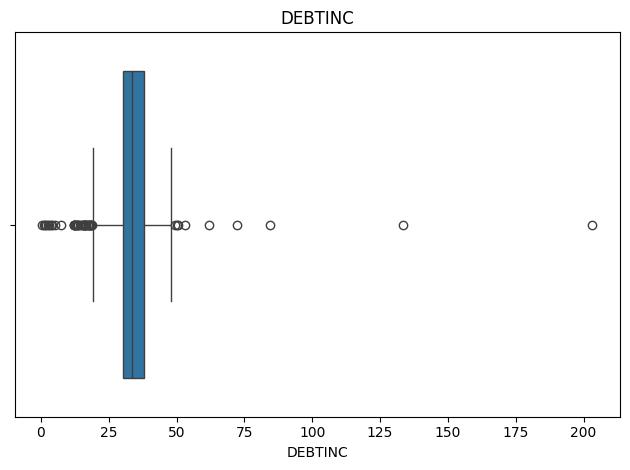

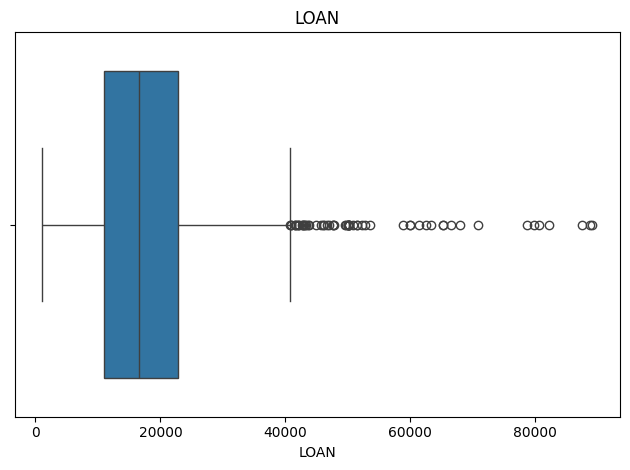

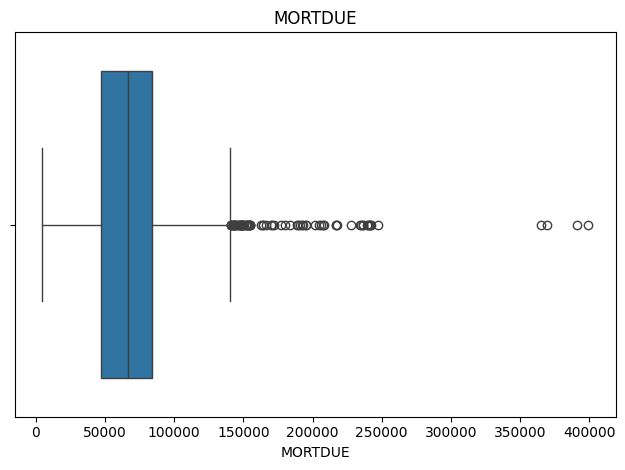

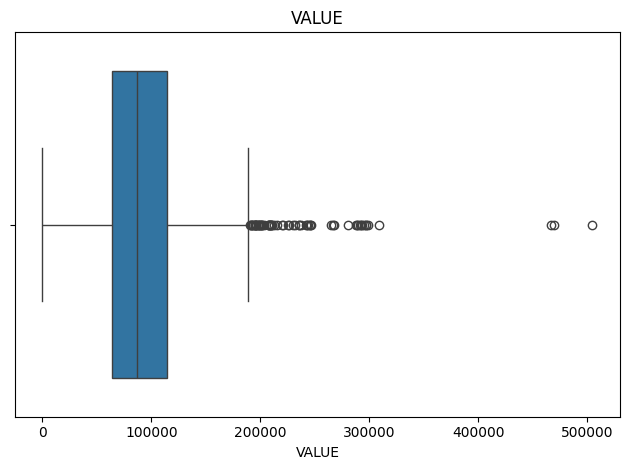

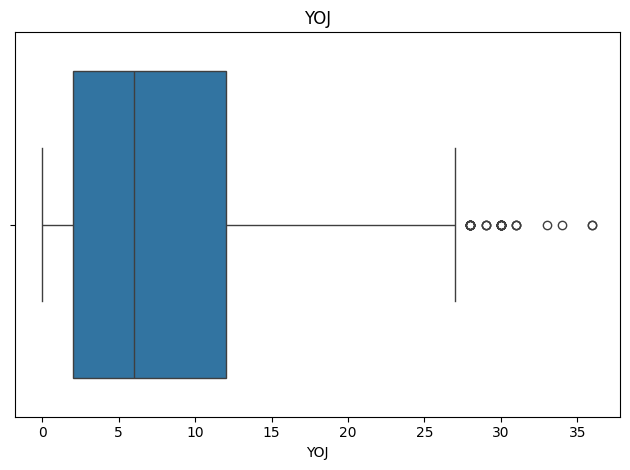

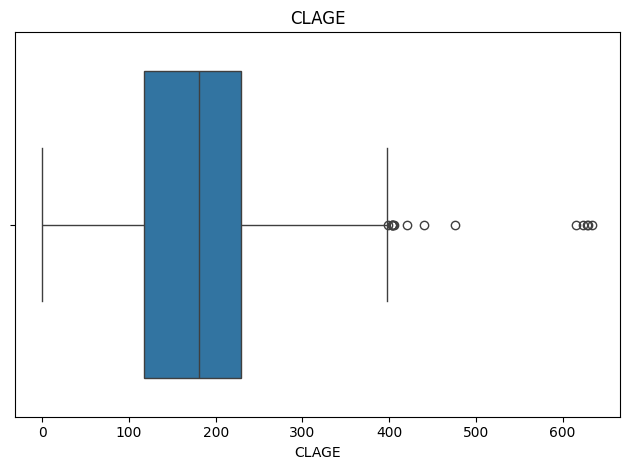

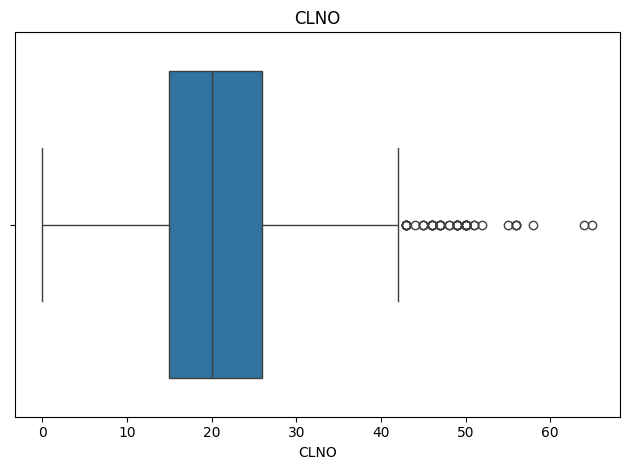

In [586]:
# aykırı değeri olan sutunların grfiğini çizmek
# Bütün kolonların Boxplot grafiğini çizip aykırı değerleri değerlendirmek


# Her bir numeric sütunu için aykırı değerleri belirleyin
for col in continuous_feature:
    Q1 = df_test[col].quantile(0.25)
    Q3 = df_test[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Sadece aykırı değerlere sahip sütunları çiz
    if any((df_test[col] < lower_limit) | (df_test[col] > upper_limit)):
        sns.boxplot(x=df_test[col])
        plt.title(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col} sütununda aykırı değer bulunmamaktadır.")

In [587]:
# Sadece seçtiğimiz kolonları min-max ile baskılamak

def aykiri_degerleri_min_max_sinirlar_ile_doldur(df, sutunlar):
    for col in sutunlar:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        alt_sinir = Q1 - 1.5 * IQR
        ust_sinir = Q3 + 1.5 * IQR

        df.loc[df[col] < alt_sinir, col] = alt_sinir
        df.loc[df[col] > ust_sinir, col] = ust_sinir

    
        
    return df

# Aykırı değerleri düzeltmek istediğiniz sütunları seçin
secilen_sutunlar = continuous_feature

# Aykırı değerleri düzelt
df = aykiri_degerleri_min_max_sinirlar_ile_doldur(df_test, secilen_sutunlar)

In [588]:
# Her bir numeric sütunu için aykırı değerleri belirleyin
for col in continuous_feature:
    Q1 = df_test[col].quantile(0.25)
    Q3 = df_test[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Sadece aykırı değerlere sahip sütunları çiz
    if any((df_test[col] < lower_limit) | (df_test[col] > upper_limit)):
        sns.boxplot(x=df_test[col])
        plt.title(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col}: sütununda aykırı değer bulunmamaktadır.")

DEBTINC: sütununda aykırı değer bulunmamaktadır.
LOAN: sütununda aykırı değer bulunmamaktadır.
MORTDUE: sütununda aykırı değer bulunmamaktadır.
VALUE: sütununda aykırı değer bulunmamaktadır.
YOJ: sütununda aykırı değer bulunmamaktadır.
CLAGE: sütununda aykırı değer bulunmamaktadır.
CLNO: sütununda aykırı değer bulunmamaktadır.


## 3 Kategorik verilerin dönüşümü

In [589]:
def sütunlari_veri_türune_gore_grupla(df):
    result_dict = {}

    for col, dtype in df.dtypes.items():
        dtype_str = str(dtype)
        
        if dtype_str not in result_dict:
            result_dict[dtype_str] = []
        
        result_dict[dtype_str].append(col)

    result_str = ""
    for dtype, columns in result_dict.items():
        result_str += f"\n{dtype} Veri Türü Sütunları:\n"
        result_str += ', '.join(columns) + '\n'
        result_str += '=' * 50 + '\n'

    return result_str

# df DataFrame'iniz olduğunu varsayalım
result = sütunlari_veri_türune_gore_grupla(df_test)

# Sonuçları görüntüleme
print(result)


float64 Veri Türü Sütunları:
DEBTINC, MORTDUE, VALUE, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO

int64 Veri Türü Sütunları:
LOAN

object Veri Türü Sütunları:
REASON, JOB



In [590]:
df_test.REASON.unique()

array(['DebtCon', 'HomeImp'], dtype=object)

In [591]:
df_test.JOB.unique()

array(['Other', 'ProfExe', 'Self', 'Mgr', 'Office', 'Sales'], dtype=object)

In [592]:
df_test = pd.get_dummies(df_test, drop_first=True, columns=['JOB', 'REASON'],dtype=int)
df_test.head()

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,REASON_HomeImp
0,22.065764,25800,71759.366722,63456.0,25.0,0.0,0.0,148.816285,0.0,8.0,0,1,0,0,0,0
1,20.380464,16400,62018.000000,91832.0,9.0,0.0,0.0,202.322500,0.0,19.0,0,0,1,0,0,0
2,29.476003,22400,18371.000000,38311.0,1.0,0.0,0.0,37.235000,2.0,3.0,0,1,0,0,0,0
3,33.448896,33400,59000.000000,85000.0,2.0,0.0,7.0,240.433333,3.0,26.0,0,0,0,0,1,1
4,29.045964,23000,71902.000000,101750.0,5.0,0.0,0.0,214.389252,0.0,13.0,0,1,0,0,0,1


In [593]:
result = sütunlari_veri_türune_gore_grupla(df_test)

# Sonuçları görüntüleme
print(result)


float64 Veri Türü Sütunları:
DEBTINC, MORTDUE, VALUE, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO

int64 Veri Türü Sütunları:
LOAN

int32 Veri Türü Sütunları:
JOB_Office, JOB_Other, JOB_ProfExe, JOB_Sales, JOB_Self, REASON_HomeImp



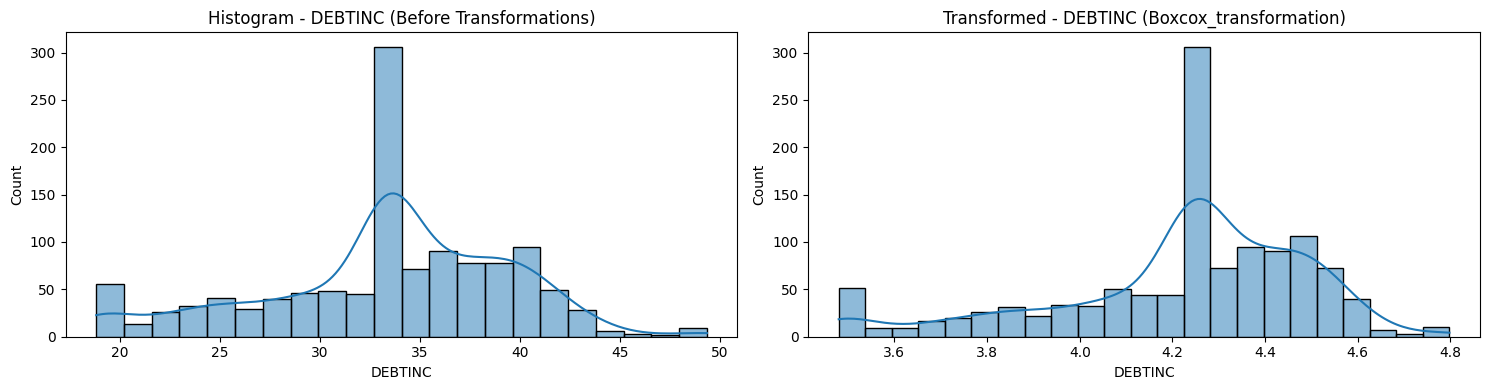

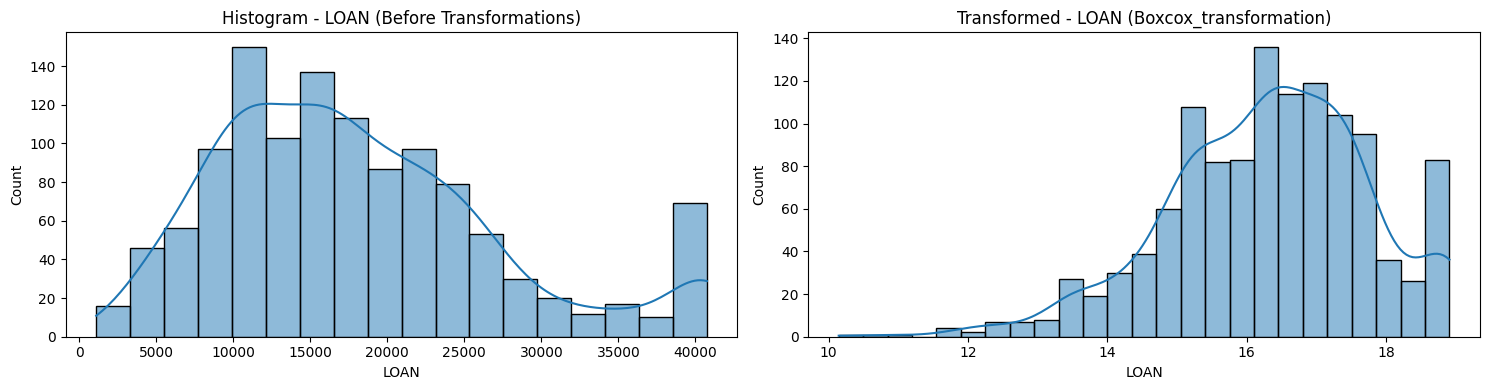

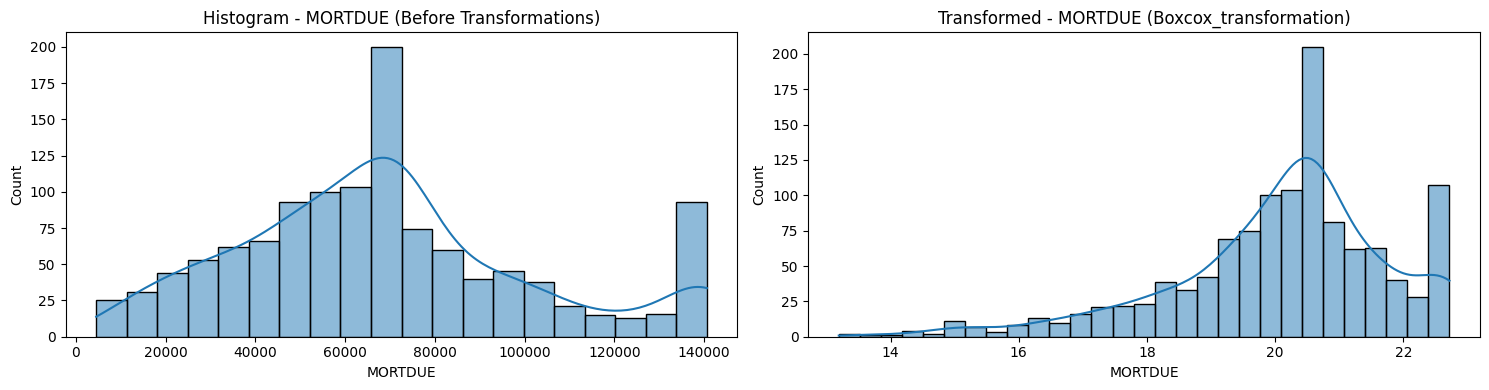

In [594]:
from sklearn.preprocessing import RobustScaler
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def apply_transformations(df, transformation_list):
    transformed_data = df.copy()

    for column in df.select_dtypes(include=['number']):
        skewness_before = skew(df[column])
        kurt_before = kurtosis(df[column])

        # Seçilen dönüşümleri uygula
        for transformation in transformation_list:
            if transformation == 'trimming':
                # Aykırı değerleri kırpma (Trimming)
                Q1 = df[column].quantile(0.25)
                Q3 = df[column].quantile(0.75)
                IQR = Q3 - Q1
                lower_limit = Q1 - 1.5 * IQR
                upper_limit = Q3 + 1.5 * IQR
                transformed_data[column] = df[column].clip(lower=lower_limit, upper=upper_limit)

            elif transformation == 'robust_scaling':
                # Robust Standartlaştırma
                scaler = RobustScaler()
                transformed_data[column] = scaler.fit_transform(df[[column]])

            elif transformation == 'log_transformation':
                # Log Dönüşümü
                transformed_data[column] = np.log1p(df[column])

            elif transformation == 'sqrt_transformation':
                # Kök Dönüşümü
                transformed_data[column] = np.sqrt(df[column])

            elif transformation == 'boxcox_transformation':
                # Box-Cox Dönüşümü
                transformed_data[column] = boxcox1p(df[column], 0.1)

        skewness_after = skew(transformed_data[column])
        kurt_after = kurtosis(transformed_data[column])

        # Görselleştirme
        if column in df.columns[:3]:
            fig, axes = plt.subplots(nrows=1, ncols=len(transformation_list) + 1, figsize=(15, 4))

            sns.histplot(df[column], ax=axes[0], kde=True)
            axes[0].set_title(f'Histogram - {column} (Before Transformations)')

            for i, transformation in enumerate(transformation_list):
                sns.histplot(transformed_data[column], ax=axes[i + 1], kde=True)
                axes[i + 1].set_title(f'Transformed - {column} ({transformation.capitalize()})')

            plt.tight_layout()
            plt.show()

    return transformed_data

# Kullanılacak dönüşüm yöntemlerini belirt
transformation_list = ['boxcox_transformation']
# Dönüşümleri uygula
df_transformed = apply_transformations(df_test, transformation_list)

In [595]:
df_test.head()

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,REASON_HomeImp
0,22.065764,25800,71759.366722,63456.0,25.0,0.0,0.0,148.816285,0.0,8.0,0,1,0,0,0,0
1,20.380464,16400,62018.000000,91832.0,9.0,0.0,0.0,202.322500,0.0,19.0,0,0,1,0,0,0
2,29.476003,22400,18371.000000,38311.0,1.0,0.0,0.0,37.235000,2.0,3.0,0,1,0,0,0,0
3,33.448896,33400,59000.000000,85000.0,2.0,0.0,7.0,240.433333,3.0,26.0,0,0,0,0,1,1
4,29.045964,23000,71902.000000,101750.0,5.0,0.0,0.0,214.389252,0.0,13.0,0,1,0,0,0,1


In [596]:
df_train.head()

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,REASON_HomeImp
0,34.521450,40000,134029.0,191990.0,0.0,1.0,0.0,178.780960,0.0,24.0,0,0,0,0,0,0,0
1,34.357866,25500,113204.0,184561.0,17.0,1.0,0.0,308.958198,1.0,31.0,0,0,0,0,1,0,0
2,25.623639,26000,20119.0,54563.0,24.0,0.0,0.0,126.987959,0.0,11.0,0,0,1,0,0,0,0
3,38.217726,8700,77377.0,97070.0,3.0,0.0,0.0,68.854877,2.0,24.0,0,0,0,0,0,0,0
4,41.538051,15800,51281.0,144202.0,1.0,0.0,0.0,285.997898,4.0,42.5,0,0,1,0,0,0,0


In [597]:
# İstediğimiz bir kolonun yerini değiştirip sona almak

yer_değiştir = df_train.pop('BAD')
df_train['BAD'] = yer_değiştir
df_train.head()

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,REASON_HomeImp,BAD
0,34.521450,40000,134029.0,191990.0,0.0,1.0,0.0,178.780960,0.0,24.0,0,0,0,0,0,0,0
1,34.357866,25500,113204.0,184561.0,17.0,1.0,0.0,308.958198,1.0,31.0,0,0,0,1,0,0,0
2,25.623639,26000,20119.0,54563.0,24.0,0.0,0.0,126.987959,0.0,11.0,0,1,0,0,0,0,0
3,38.217726,8700,77377.0,97070.0,3.0,0.0,0.0,68.854877,2.0,24.0,0,0,0,0,0,0,0
4,41.538051,15800,51281.0,144202.0,1.0,0.0,0.0,285.997898,4.0,42.5,0,1,0,0,0,0,0


In [598]:
x = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

In [599]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [600]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
classifier = lgb.LGBMClassifier()
classifier.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 721, number of negative: 2855
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1415
[LightGBM] [Info] Number of data points in the train set: 3576, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.201622 -> initscore=-1.376188
[LightGBM] [Info] Start training from score -1.376188


LGBMClassifier()

In [601]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
        'n_estimators': [100, 500],
        'subsample': [0.8, 1.0],
        'max_depth': [None], 
        'learning_rate': [0.1, 0.3],
        'min_child_weight': [1, 3, 5],
        "learning_rate":[0.1,0.5],
        "random_state":[0,42],
        "reg_lambda":[0,0.3,0.5],
        "reg_alpha":[0,0.3,0.5],
        'num_leaves':[4]}

xgboost_cv = RandomizedSearchCV(classifier, parameters, cv = 3, n_jobs = -1) # , verbose = 2)

xgboost_cv.fit(x_train, y_train)

best = xgboost_cv.best_params_
best

[LightGBM] [Info] Number of positive: 721, number of negative: 2855
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1415
[LightGBM] [Info] Number of data points in the train set: 3576, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.201622 -> initscore=-1.376188
[LightGBM] [Info] Start training from score -1.376188


{'subsample': 0.8,
 'reg_lambda': 0,
 'reg_alpha': 0,
 'random_state': 0,
 'num_leaves': 4,
 'n_estimators': 100,
 'min_child_weight': 1,
 'max_depth': None,
 'learning_rate': 0.5}

In [602]:
import lightgbm as lgb
classifier = lgb.LGBMClassifier(subsample=1,reg_lambda=0.3,reg_alpha=0.5,n_estimators=500,min_child_weight=3,max_depth=None,learning_rate=0.1,num_leaves=3,random_state=42)
classifier.fit(x_train,y_train)

# subsample=1,reg_lambda=0.3,reg_alpha=0.5,n_estimators=500,min_child_weight=3,max_depth=None,learning_rate=0.1,num_leaves=3,random_state=42

[LightGBM] [Info] Number of positive: 721, number of negative: 2855
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1415
[LightGBM] [Info] Number of data points in the train set: 3576, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.201622 -> initscore=-1.376188
[LightGBM] [Info] Start training from score -1.376188


LGBMClassifier(max_depth=None, min_child_weight=3, n_estimators=500,
               num_leaves=3, random_state=42, reg_alpha=0.5, reg_lambda=0.3,
               subsample=1)

In [603]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[922  35]
 [ 68 167]]


0.9135906040268457

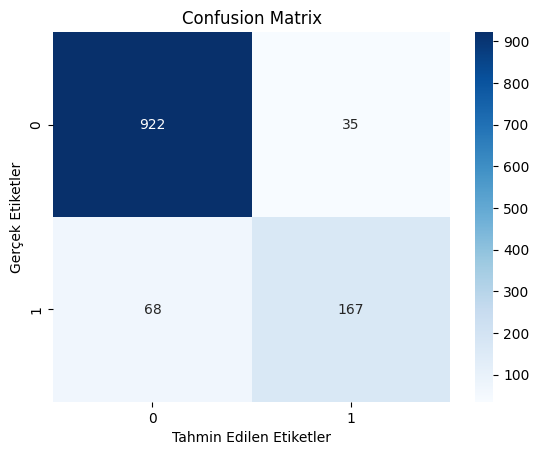

In [604]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap'i çizme
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Eksen etiketlerini ayarlama
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")

# Grafiği gösterme
plt.show()

In [605]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
doğruluk_test = accuracy
print("Doğruluk:", accuracy)

Doğruluk: 0.9135906040268457


In [606]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
kesinlik_test = precision
Hassasiyet_test = recall

print("Kesinlik:", precision)
print("Hassasiyet:", recall)

Kesinlik: 0.8267326732673267
Hassasiyet: 0.7106382978723405


In [607]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
f1_test = f1
print("F1 Skoru:", f1)

F1 Skoru: 0.7643020594965676


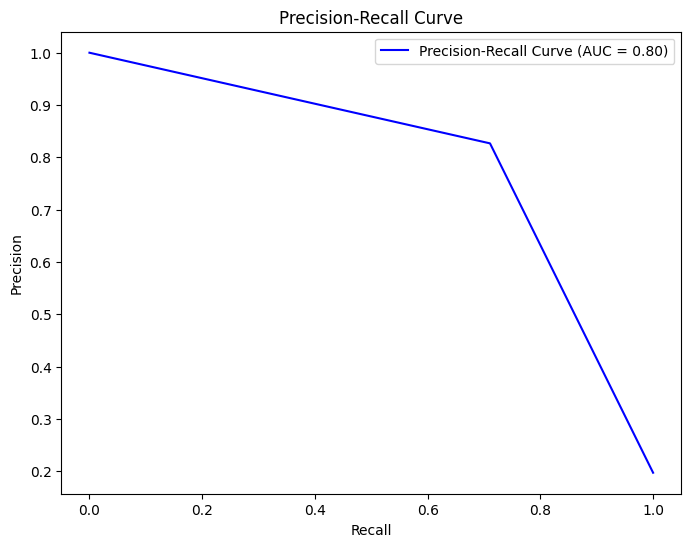

In [608]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(y_test, y_pred)
area_under_curve = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {area_under_curve:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [609]:
""" # !!! KONTROL !!! """

' # !!! KONTROL !!! '

In [610]:
y_pred_train = classifier.predict(x_train)

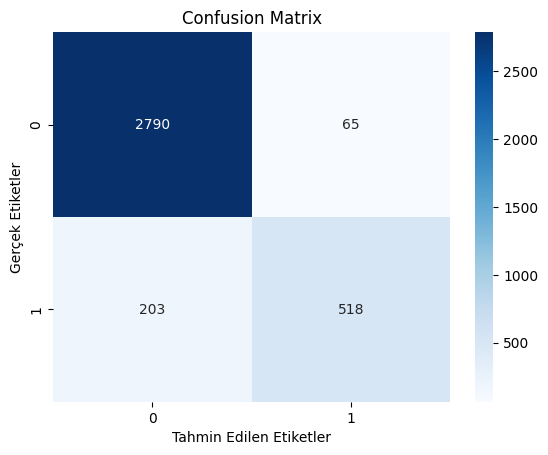

In [611]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_train)

# Heatmap'i çizme
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Eksen etiketlerini ayarlama
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")

# Grafiği gösterme
plt.show()

In [612]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred_train)
doğruluk_train = accuracy
print("Doğruluk:", accuracy)

Doğruluk: 0.9250559284116331


In [613]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
kesinlik_train = precision
Hassasiyet_train = recall

print("Kesinlik:", precision)
print("Hassasiyet:", recall)

Kesinlik: 0.888507718696398
Hassasiyet: 0.7184466019417476


In [614]:
from sklearn.metrics import f1_score

f1 = f1_score(y_train, y_pred_train)
f1_train = f1
print("F1 Skoru:", f1)

F1 Skoru: 0.794478527607362


In [615]:
print("test seti")
print(f"Doğruluk:{doğruluk_test}\nKesinlik:{kesinlik_test}\nHassasiyet:{Hassasiyet_test}\nf1:{f1_test}\n")

print("eğitim seti")
print(f"Doğruluk:{doğruluk_train}\nKesinlik:{kesinlik_train}\nHassasiyet:{Hassasiyet_train}\nf1:{f1_train}\n")

test seti
Doğruluk:0.9135906040268457
Kesinlik:0.8267326732673267
Hassasiyet:0.7106382978723405
f1:0.7643020594965676

eğitim seti
Doğruluk:0.9250559284116331
Kesinlik:0.888507718696398
Hassasiyet:0.7184466019417476
f1:0.794478527607362



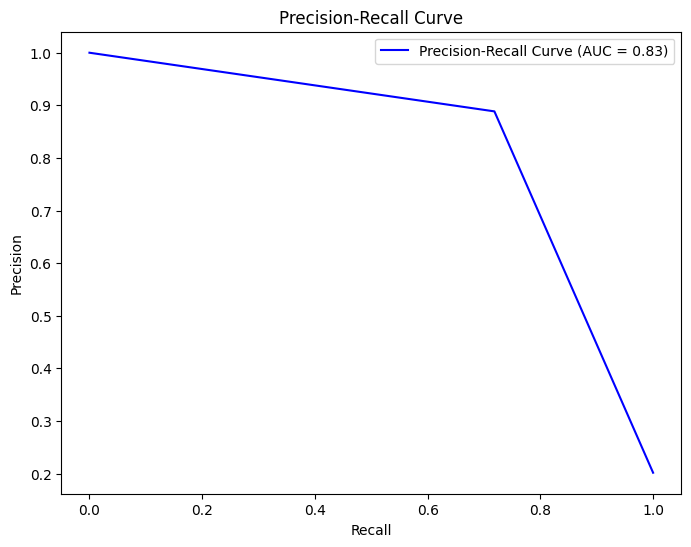

In [616]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(y_train, y_pred_train)
area_under_curve = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {area_under_curve:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [617]:
unsen = df_test.iloc[:, :].values
unsen

array([[2.20657636e+01, 2.58000000e+04, 7.17593667e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.03804642e+01, 1.64000000e+04, 6.20180000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.94760034e+01, 2.24000000e+04, 1.83710000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.34488962e+01, 6.50000000e+03, 7.03000000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.70567270e+01, 2.67000000e+04, 8.19680000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.08570671e+01, 1.95000000e+04, 9.45430000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [618]:
unsen_pred = classifier.predict(unsen)
unsen_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [619]:
unsen_pred_df = pd.DataFrame(unsen_pred, columns=["BAD"])
unsen_pred_df.head(10)

,BAD
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,0


In [620]:
all_df = df_test.merge(unsen_pred_df, how="left", left_index=True, right_index=True)
all_df

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,REASON_HomeImp,BAD
0,22.065764,25800,71759.366722,63456.0,25.0,0.0,0.0,148.816285,0.0,8.0,0,1,0,0,0,0,0
1,20.380464,16400,62018.000000,91832.0,9.0,0.0,0.0,202.322500,0.0,19.0,0,0,1,0,0,0,0
2,29.476003,22400,18371.000000,38311.0,1.0,0.0,0.0,37.235000,2.0,3.0,0,1,0,0,0,0,0
3,33.448896,33400,59000.000000,85000.0,2.0,0.0,7.0,240.433333,3.0,26.0,0,0,0,0,1,1,1
4,29.045964,23000,71902.000000,101750.0,5.0,0.0,0.0,214.389252,0.0,13.0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,25.991820,16100,26276.000000,168105.0,7.0,0.0,0.0,336.198465,0.0,26.0,0,0,0,0,1,1,0
1188,34.430575,16500,23169.000000,41677.0,20.0,0.0,0.0,208.076943,2.0,15.0,0,0,1,0,0,0,0
1189,33.448896,6500,70300.000000,107500.0,1.0,0.0,0.0,242.466667,1.0,38.0,1,0,0,0,0,0,0
1190,27.056727,26700,81968.000000,114647.0,10.0,0.0,1.0,126.707320,0.0,19.0,0,0,1,0,0,0,0


In [621]:
submission = pd.read_csv("sample_submission.csv")
submission.head()

,index,BAD
0,4768,0
1,4769,0
2,4770,0
3,4771,1
4,4772,0


In [625]:
submission["BAD"] = unsen_pred_df["BAD"]
submission.head()

,index,BAD
0,4768,0
1,4769,0
2,4770,0
3,4771,1
4,4772,0


In [626]:
"""# Temizlenmiş veriyi CSV dosyasına kaydetmek
submission.to_csv('submission_hmeq.csv', index=False)"""

In [624]:
count_of_ones = submission["BAD"].sum()
print("Toplam 1 sayısı:", count_of_ones)
count_of_zeros = (submission["BAD"] == 0).sum()
print("Toplam 0 sayısı:", count_of_zeros)

Toplam 1 sayısı: 80
Toplam 0 sayısı: 1112
